Adam Peetz<br>
MSDS 686 Deep Learning<br>
Professor Nasheb Ismaily<br>
Regis Jesuit University<br>
May 22nd 2022

# Reuters Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the Keras Reuters dataset to classify news wires into 46 different categories.  Use regularization and stopearly call backs to improve your neural network.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\adamg\AppData\Local\Temp\ipykernel_14816\1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%load_ext tensorboard

In [3]:
# Import all the necessary libraries and set the np and tf seed
#tensorflow block
import tensorflow as tf

#Keras API Block
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from tensorflow.keras.datasets import reuters

#Support block
import numpy as np
import pandas as pd
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# set seed values
tf.random.set_seed(1234)
np.random.seed(1234)

In [4]:
# Import the Reuters data set from the Keras library. https://keras.io/datasets/
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [5]:
# Function to vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
# Vectorize the train_data and test_data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [7]:
# Encode the labels to categorical. 
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Couldnt this be done with a valadation split?

In [8]:
# Split the data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# In each Jupiter Notebook cell build a model using validation data, show loss and accuracy monitoring graphs, and print model evaluation all in one cell.  

# Make sure you keep the same number of hidden layers, hidden nodes (neurons), and early stopping callbacks consistent so you can accurately compare the different regularization techniques.  However, adjust parameters and hidden layers and nodes to build the best model at the end of the assignment.


Epoch 1/20
14/14 [==============================] - 25s 237ms/step - loss: 1.8108 - categorical_accuracy: 0.5885 - val_loss: 1.1919 - val_categorical_accuracy: 0.7391
Epoch 2/20
14/14 [==============================] - 2s 160ms/step - loss: 0.6616 - categorical_accuracy: 0.8437 - val_loss: 0.9306 - val_categorical_accuracy: 0.8010
Epoch 3/20
14/14 [==============================] - 2s 140ms/step - loss: 0.2695 - categorical_accuracy: 0.9375 - val_loss: 0.9317 - val_categorical_accuracy: 0.8157
Epoch 4/20
14/14 [==============================] - 2s 126ms/step - loss: 0.1522 - categorical_accuracy: 0.9611 - val_loss: 1.0409 - val_categorical_accuracy: 0.8157
Epoch 5/20
14/14 [==============================] - 2s 126ms/step - loss: 0.1228 - categorical_accuracy: 0.9633 - val_loss: 1.0001 - val_categorical_accuracy: 0.8112
Epoch 6/20
14/14 [==============================] - 2s 139ms/step - loss: 0.1089 - categorical_accuracy: 0.9656 - val_loss: 0.9596 - val_categorical_accuracy: 0.8241
Epo

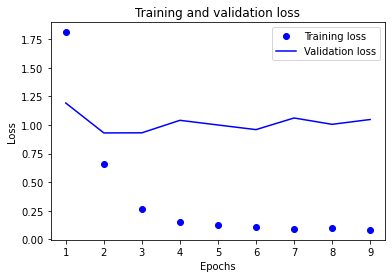

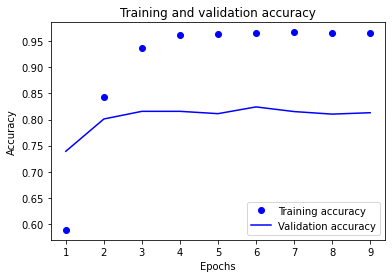

71/71 [==============================] - 0s 6ms/step - loss: 1.0139 - categorical_accuracy: 0.8072
['loss', 'categorical_accuracy']
[1.0139349699020386, 0.8072128295898438]


In [9]:
# Baseline model for comparison of regularization techniques. 

backend.clear_session()
tf.random.set_seed(1234)
np.random.seed(1234)
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

# Baseline Model Performance Comments

A baseline model has been created to gauge the performance of the regularization techniques that follow. It takes an average of 14 seconds per epoch to train. It reached peak performance after 6 epochs, and it achieves a categorical accuracy rating of 80% on test data.


## Build 2 different sequential neural network models utilizing 2 differnt l_1 regularization values (l1 = 0.001 and l1 = 0.01) and early stopping.

Epoch 1/20
14/14 [==============================] - 29s 2s/step - loss: 3989.1438 - categorical_accuracy: 0.3003 - val_loss: 1110.2592 - val_categorical_accuracy: 0.3566
Epoch 2/20
14/14 [==============================] - 27s 2s/step - loss: 870.7610 - categorical_accuracy: 0.3501 - val_loss: 487.3543 - val_categorical_accuracy: 0.3566
Epoch 3/20
14/14 [==============================] - 26s 2s/step - loss: 361.1227 - categorical_accuracy: 0.3501 - val_loss: 242.0105 - val_categorical_accuracy: 0.3566
Epoch 4/20
14/14 [==============================] - 25s 2s/step - loss: 185.5013 - categorical_accuracy: 0.3501 - val_loss: 138.1918 - val_categorical_accuracy: 0.3566


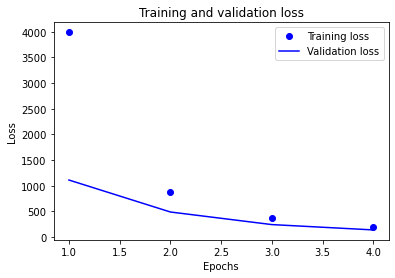

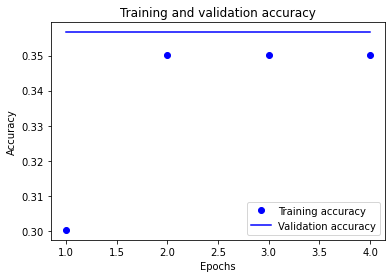

71/71 [==============================] - 21s 294ms/step - loss: 1110.2595 - categorical_accuracy: 0.3620
['loss', 'categorical_accuracy']
[1110.259521484375, 0.36197686195373535]


In [18]:
# Build a sequential neural network model utilizing  l_1 = 0.01 and early stopping.

backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.01), input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu',kernel_regularizer = regularizers.l1_l2(l1 = 0.01)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

Epoch 1/20
14/14 [==============================] - 27s 2s/step - loss: 436.6380 - categorical_accuracy: 0.4543 - val_loss: 119.9816 - val_categorical_accuracy: 0.5080
Epoch 2/20
14/14 [==============================] - 25s 2s/step - loss: 94.8997 - categorical_accuracy: 0.5120 - val_loss: 56.8369 - val_categorical_accuracy: 0.5125
Epoch 3/20
14/14 [==============================] - 24s 2s/step - loss: 40.8621 - categorical_accuracy: 0.5099 - val_loss: 25.6950 - val_categorical_accuracy: 0.5160
Epoch 4/20
14/14 [==============================] - 24s 2s/step - loss: 21.0675 - categorical_accuracy: 0.5246 - val_loss: 17.2536 - val_categorical_accuracy: 0.5441
Epoch 5/20
14/14 [==============================] - 24s 2s/step - loss: 14.9962 - categorical_accuracy: 0.5563 - val_loss: 13.6005 - val_categorical_accuracy: 0.5726
Epoch 6/20
14/14 [==============================] - 24s 2s/step - loss: 13.2733 - categorical_accuracy: 0.5772 - val_loss: 12.7239 - val_categorical_accuracy: 0.5913
Ep

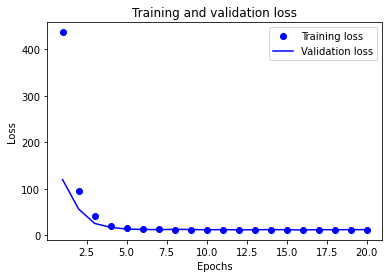

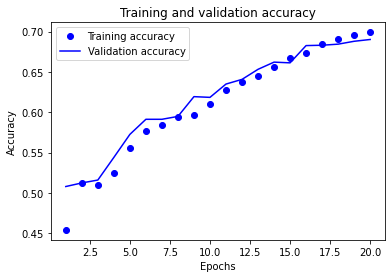

71/71 [==============================] - 19s 269ms/step - loss: 12.3389 - categorical_accuracy: 0.6812
['loss', 'categorical_accuracy']
[12.338891983032227, 0.6812110543251038]


In [10]:
# Build a sequential neural network model utilizing  l_1 = 0.001 and early stopping.

backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.001), input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.001)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

### Comment on how the different l1 regularization values affected the speed and accuracy of the model. (5 points)

<b>Speed</b><br>
L1 regularization increases the training time of the model. Each epoch takes around 24 seconds, 10 seconds more than the baseline model. 

The L1 regularization model with 0.01 settings arrives at its best solution after 2 epochs. It takes many more epochs for the model to converge on a solution with an 0.001 setting. The model is still increasing its accuracy at 20 epochs, compared to 9 epochs for the baseline model.

<b>Accuracy</b><br>
L1 regularization with 0.01 values performs poorly when compared to the baseline model. It stops learning after 2 epochs and only obtains an accuracy rating of 36% on its test. This accuracy rating is about the same as the null information rate. Similar accuracy could be achieved by blindly labeling all content with the label of the most frequently occurring class in the dataset. 

Stopping after only 2 epochs with poor accuracy is an indication that the model failed to converge on a solution with this regularization setting. 

L1 regularization with 0.001 values performs better than the model with a 0.01 setting. It continues to improve its accuracy over 20 epochs. Its validation and training curves are closely linked, suggesting the model is neither over or underfitted to its training data. Its accuracy score is 68% when tested, this is lower than the baseline model but is likely to be more generalized as indicated by its training and validation curves.


## Build 2 different sequential neural network model(s) utilizing 2 differnt l_2 regularization values (l1 = 0.001 and l1 = 0.01) and early stopping.

Epoch 1/20
14/14 [==============================] - 29s 2s/step - loss: 3989.1335 - categorical_accuracy: 0.3060 - val_loss: 1110.1984 - val_categorical_accuracy: 0.3566
Epoch 2/20
14/14 [==============================] - 25s 2s/step - loss: 870.7563 - categorical_accuracy: 0.3501 - val_loss: 487.3555 - val_categorical_accuracy: 0.3566
Epoch 3/20
14/14 [==============================] - 22s 2s/step - loss: 361.1111 - categorical_accuracy: 0.3501 - val_loss: 241.9703 - val_categorical_accuracy: 0.3566
Epoch 4/20
14/14 [==============================] - 22s 2s/step - loss: 185.4935 - categorical_accuracy: 0.3501 - val_loss: 138.2258 - val_categorical_accuracy: 0.3566


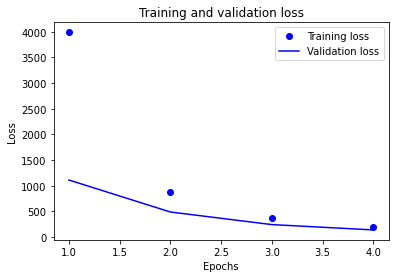

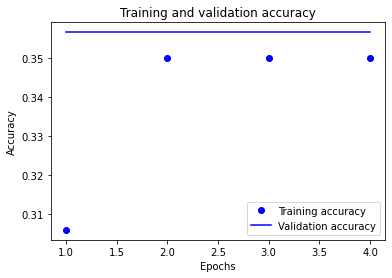

71/71 [==============================] - 18s 251ms/step - loss: 1110.1998 - categorical_accuracy: 0.3620
['loss', 'categorical_accuracy']
[1110.1998291015625, 0.36197686195373535]


In [19]:
# Build a sequential neural network model utilizing  l_2 = 0.01 and early stopping.
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l2 = 0.01), input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l2 = 0.01)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

Epoch 1/20
14/14 [==============================] - 26s 2s/step - loss: 3955.3655 - categorical_accuracy: 0.2758 - val_loss: 1104.5254 - val_categorical_accuracy: 0.3566
Epoch 2/20
14/14 [==============================] - 24s 2s/step - loss: 865.4660 - categorical_accuracy: 0.3501 - val_loss: 482.0430 - val_categorical_accuracy: 0.3566
Epoch 3/20
14/14 [==============================] - 23s 2s/step - loss: 359.1118 - categorical_accuracy: 0.3501 - val_loss: 240.4568 - val_categorical_accuracy: 0.3566
Epoch 4/20
14/14 [==============================] - 23s 2s/step - loss: 184.8781 - categorical_accuracy: 0.3501 - val_loss: 136.6404 - val_categorical_accuracy: 0.3566


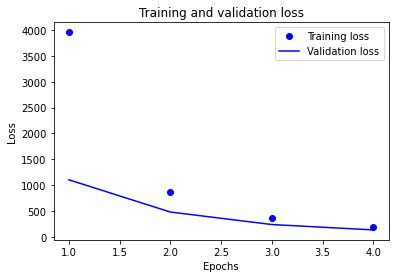

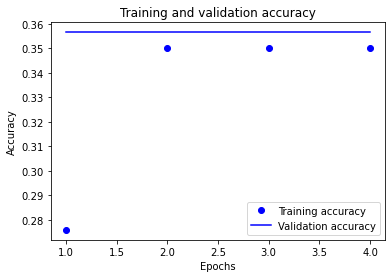

71/71 [==============================] - 18s 253ms/step - loss: 1104.5250 - categorical_accuracy: 0.3620
['loss', 'categorical_accuracy']
[1104.5250244140625, 0.36197686195373535]


In [20]:
# Build a sequential neural network model utilizing  l_2 = 0.001 and early stopping.
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l2 = 0.001), input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu',kernel_regularizer = regularizers.l1_l2(l2 = 0.001)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

### Comment on how the different l2 regularization values affected the speed and accuracy of the model and how did they compare, respectively to the l1 regularization?

<b>Speed</b><br>

L2 regularization increases the training time of the model. Each epoch takes around 24 seconds, 10 seconds more than the baseline model. 

Both models stop at 2 epochs with poor accuracy. This indicates that the models failed to converge on a solution with these regularization settings.

<b>Accuracy</b><br>

Both models perform poorly when tested, achieving only 36% accuracy on their test data. This accuracy rate is similar to the null information rate. 

<b>L1 Comparison</b><br>

The training time for the L2 models is similar to L1 regularization, requiring about 24 seconds per epoch. They both show similar behavior to the L1 0.01 model, which failed to converge on a solution. Both L2 models are outperformed by the L1 regularization model with 0.001 settings. 


## Build 2 different sequential neural network model(s) utilizing dropouts (0.5 and 0.2) and early stopping.

Epoch 1/20
14/14 [==============================] - 15s 1s/step - loss: 1.9573 - categorical_accuracy: 0.5589 - val_loss: 1.2925 - val_categorical_accuracy: 0.7142
Epoch 2/20
14/14 [==============================] - 13s 963ms/step - loss: 0.9657 - categorical_accuracy: 0.7804 - val_loss: 1.0483 - val_categorical_accuracy: 0.7734
Epoch 3/20
14/14 [==============================] - 14s 1s/step - loss: 0.5768 - categorical_accuracy: 0.8676 - val_loss: 0.9112 - val_categorical_accuracy: 0.8161
Epoch 4/20
14/14 [==============================] - 12s 855ms/step - loss: 0.3373 - categorical_accuracy: 0.9206 - val_loss: 0.9516 - val_categorical_accuracy: 0.8108
Epoch 5/20
14/14 [==============================] - 12s 886ms/step - loss: 0.2194 - categorical_accuracy: 0.9461 - val_loss: 0.9816 - val_categorical_accuracy: 0.8206
Epoch 6/20
14/14 [==============================] - 14s 996ms/step - loss: 0.1784 - categorical_accuracy: 0.9584 - val_loss: 0.9965 - val_categorical_accuracy: 0.8232
Epoc

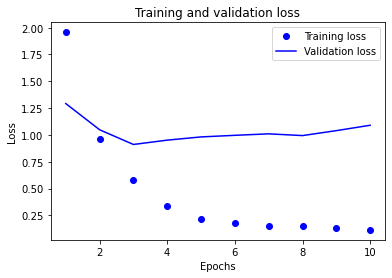

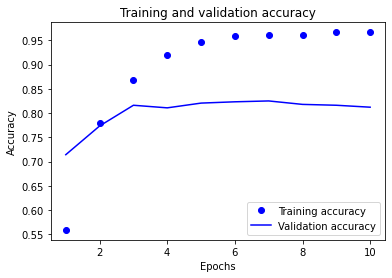

71/71 [==============================] - 3s 35ms/step - loss: 1.0763 - categorical_accuracy: 0.7992
['loss', 'categorical_accuracy']
[1.076335072517395, 0.799198567867279]


In [13]:
# Build a sequential neural network model utilizing dropout = 0.5 and early stopping.
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

Epoch 1/20
14/14 [==============================] - 13s 857ms/step - loss: 1.8421 - categorical_accuracy: 0.5901 - val_loss: 1.1849 - val_categorical_accuracy: 0.7364
Epoch 2/20
14/14 [==============================] - 12s 860ms/step - loss: 0.7464 - categorical_accuracy: 0.8239 - val_loss: 0.9463 - val_categorical_accuracy: 0.8005
Epoch 3/20
14/14 [==============================] - 12s 868ms/step - loss: 0.3514 - categorical_accuracy: 0.9230 - val_loss: 0.9385 - val_categorical_accuracy: 0.8197
Epoch 4/20
14/14 [==============================] - 12s 897ms/step - loss: 0.1921 - categorical_accuracy: 0.9547 - val_loss: 0.9877 - val_categorical_accuracy: 0.8192
Epoch 5/20
14/14 [==============================] - 13s 928ms/step - loss: 0.1473 - categorical_accuracy: 0.9611 - val_loss: 1.0238 - val_categorical_accuracy: 0.8157
Epoch 6/20
14/14 [==============================] - 13s 972ms/step - loss: 0.1187 - categorical_accuracy: 0.9650 - val_loss: 0.9906 - val_categorical_accuracy: 0.820

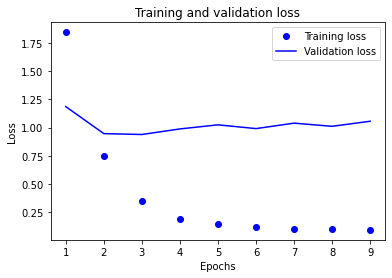

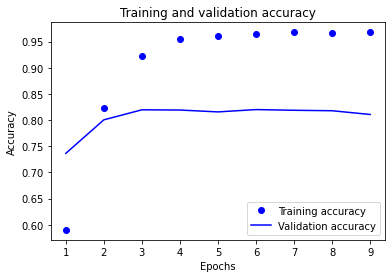

71/71 [==============================] - 5s 51ms/step - loss: 1.0431 - categorical_accuracy: 0.8054
['loss', 'categorical_accuracy']
[1.0430799722671509, 0.8054319024085999]


In [14]:
# Build a sequential neural network model utilizing dropout = 0.2 and early stopping.
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

### Comment on how the different dropouts  values affected the speed and accuracy of the model and how did they compare, respectively to the l1 and l2 regularization?

<b>Speed</b><br>

The dropout models took around 13 seconds per epoch. This amount of time is similar to the training time of the baseline model. They also used a similar number of epochs when compared to the baseline, requiring 8 and 7 epochs to reach their best performance.

<b>Accuracy</b><br>

The accuracy of both models was around 80%. This accuracy is similar to the baseline model. Their training curves show signs of being overfitted to the training data, and may have had their best combination of parameters at the second epoch were their training and validation curves begin to diverge.

<b>L1/L2 Comparison</b><br>

These dropout models show faster training and better performance than the L1 and L2 models. In addition to this, they were able to converge on a solution under both settings. However, their curves suggest they are prone to overfitting. The only model that has overcome this fitting issue has been the L1 0.001 model, which had very closely linked training and validation curves.


## Build a sequential neural network model utilizing batch normalization and early stopping.


Epoch 1/20
14/14 [==============================] - 32s 2s/step - loss: 1.6458 - categorical_accuracy: 0.6982 - val_loss: 2.8335 - val_categorical_accuracy: 0.7484
Epoch 2/20
14/14 [==============================] - 18s 1s/step - loss: 0.2886 - categorical_accuracy: 0.9454 - val_loss: 2.8941 - val_categorical_accuracy: 0.7614
Epoch 3/20
14/14 [==============================] - 16s 1s/step - loss: 0.1339 - categorical_accuracy: 0.9648 - val_loss: 2.8518 - val_categorical_accuracy: 0.7324
Epoch 4/20
14/14 [==============================] - 16s 1s/step - loss: 0.1094 - categorical_accuracy: 0.9663 - val_loss: 2.7198 - val_categorical_accuracy: 0.7102
Epoch 5/20
14/14 [==============================] - 18s 1s/step - loss: 0.0916 - categorical_accuracy: 0.9663 - val_loss: 2.5721 - val_categorical_accuracy: 0.7133


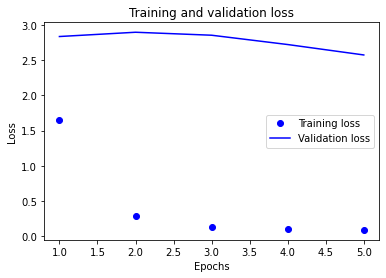

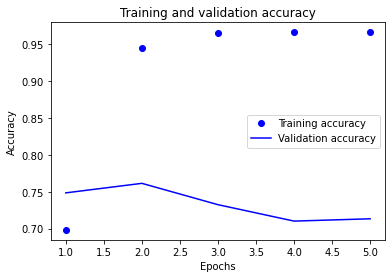

71/71 [==============================] - 4s 49ms/step - loss: 2.9189 - categorical_accuracy: 0.7422
['loss', 'categorical_accuracy']
[2.918926477432251, 0.7422083616256714]


In [15]:
# Build a sequential neural network model utilizing bach normalization and early stopping.
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', input_shape = (10000,)))
model.add(BatchNormalization())
model.add(layers.Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

### Comment on how batch normalization affected the speed and accuracy of the model and how did it compare, respectively to the l1, l2, and dropout regularization?

<b>Speed</b><br>

The batch norm model took around 18 seconds per epoch to train. This is 4 seconds slower than the baseline model that took around 14 seconds per epoch. 

The batch norm model was the fastest to converge on a solution. It used fewer epochs to train than the baseline model, arriving at its best solution after 2 epochs. 

<b>Accuracy</b><br>

The batch norm model was able to obtain 74% accuracy on test. This outperforms the null information rate of 35%, but falls short of the accuracy obtained by the baseline model.  The immediate divergence of the training and validation curves suggests this model is overfit to its training data. 

<b>L1/L2/Dropout Comparison</b><br>

The batch norm model was both faster and more accurate than the L1 and L2 regularization models, most of which were unable to converge on a solution. However, it was slower and less accurate than the models created with dropout. Its validation and loss curves immediately show signs of being overfit to its data. While this model somewhat matches the fitting of the dropout models, it does not compare to the outstanding fitment curve of the L1 0.001 model.


## Build your best model utilizing all or some of regularization, batch normalization, dropouts, and an early stopping.

Epoch 1/60
14/14 [==============================] - 28s 2s/step - loss: 415.7565 - categorical_accuracy: 0.4663 - val_loss: 110.7469 - val_categorical_accuracy: 0.6069
Epoch 2/60
14/14 [==============================] - 24s 2s/step - loss: 89.5905 - categorical_accuracy: 0.6033 - val_loss: 53.7839 - val_categorical_accuracy: 0.6634
Epoch 3/60
14/14 [==============================] - 23s 2s/step - loss: 38.3945 - categorical_accuracy: 0.6244 - val_loss: 24.6376 - val_categorical_accuracy: 0.6420
Epoch 4/60
14/14 [==============================] - 23s 2s/step - loss: 20.1266 - categorical_accuracy: 0.6488 - val_loss: 16.0602 - val_categorical_accuracy: 0.6634
Epoch 5/60
14/14 [==============================] - 22s 2s/step - loss: 14.2951 - categorical_accuracy: 0.6765 - val_loss: 13.1566 - val_categorical_accuracy: 0.6741
Epoch 6/60
14/14 [==============================] - 23s 2s/step - loss: 12.6407 - categorical_accuracy: 0.6832 - val_loss: 12.1455 - val_categorical_accuracy: 0.6919
Ep

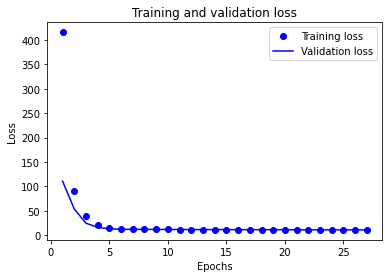

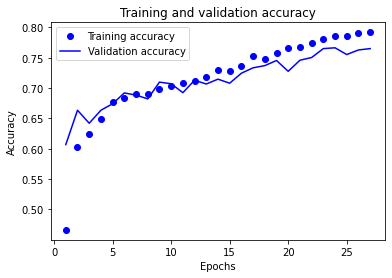

71/71 [==============================] - 18s 252ms/step - loss: 11.0350 - categorical_accuracy: 0.7627
['loss', 'categorical_accuracy']
[11.034987449645996, 0.7626892328262329]


In [21]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8196, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.001), input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['categorical_accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs = 60,
                   batch_size = 500,
                   validation_data = (X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

### Comment on which techniques you used to build the best model with the highest accuracy.

<b>Hyperparameter Selection</b><br>
The most promising performance improvement was demonstrated by the L1 0.001 model, whose training and validation curves were closely aligned, signaling that it avoided overfitting to the training data. L1 regularization will be implemented in the first hidden layer. A few experiments were conducted and it was discovered that L1 regularization in the first hidden layer would create this desirable curve. This technique is combined with dropout in the second layer. Dropout in the second layer should prevent rigid reward paths from developing inside the model, which will further assist in the development of a generalized solution. In addition to these two changes, the total number of training epochs is increased to give it more time to train and achieve an optimal combination of parameters. 

<b>Performance Discussion</b><br>
The model’s speed is slower than the baseline model, requiring about 24 seconds per epoch to train. It also takes more epochs for it to converge on a solution, arriving at its best combination of parameters after 24 epochs of training. Its validation and loss curves are closely tied together, indicating that it is a generalized model that has not become overfit to its training data. It achieves a test accuracy of 76%. While this accuracy is slightly worse than that of the baseline model, it should be generalized for the given task. The 4% performance tradeoff would be worthwhile if it ensures better performance on never-before-seen combinations of inputs.
